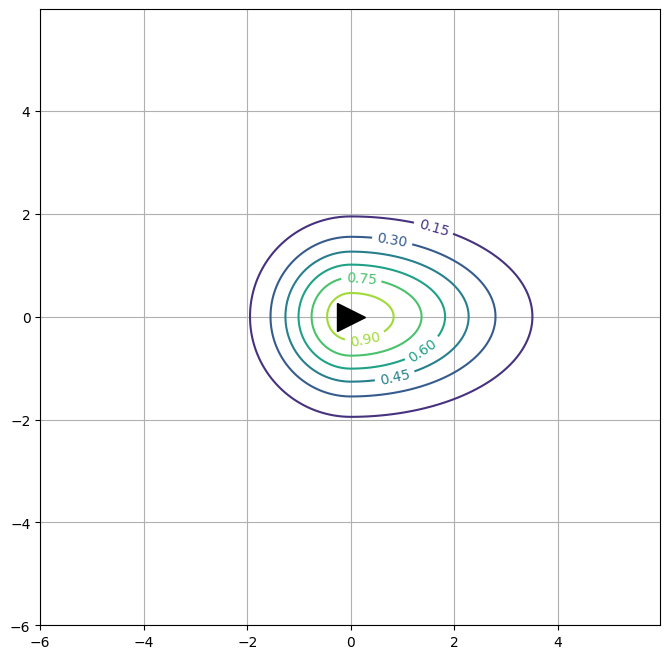

In [49]:
#
# Advanced Robotics, 2023-2024
# Paul Baxter
# Workshop Week 1
#
# code based on matplotlib tutorial: https://python4mpia.github.io/plotting/matplotlib.html
#
# Human assumed to be at point (0,0) - black arrow facing +x-axis
#
# Run with:     python gaussian_viz.py
#
# May need following depedencies, e.g.:
#   python -mpip install numpy
#                        scipy
#                        matplotlib
#
# See comments on l69 for use of two gaussians
# See l84 for saving plots
#

import numpy as np
import matplotlib.pyplot as plt

###################
# params to alter #
###################
x1_mean = 0.0
y1_mean = 0.0
x1_sig = 1.0
y1_sig = 1.0

x2_mean = 0.0
y2_mean = 0.0
x2_sig = 1.8
y2_sig = 1.0
###################


def gaussian(x, y, x0, y0, xsig, ysig):
    return np.exp(-0.5 * (((x - x0) / xsig) ** 2 + ((y - y0) / ysig) ** 2))


def plot_costmap(
    x1_mean,
    y1_mean,
    x1_sig,
    y1_sig,
    x2_mean,
    y2_mean,
    x2_sig,
    y2_sig,
    extent=6.0,
    x_division=0,
):
    delta = 0.025

    ###################
    # single gaussian #
    ###################
    # x = np.arange(-extent, extent, delta)
    y = np.arange(-extent, extent, delta)
    # X, Y1 = np.meshgrid(x, y)
    # z = gaussian(X, Y1, x1_mean, y1_mean, x1_sig, y1_sig)

    ######################
    # multiple gaussians #
    ######################
    # just examples shown, change as desired

    # gaussian 1 - negative x-axis
    x1 = np.arange(x_division-extent, x_division, delta)
    X1, Y = np.meshgrid(x1, y)
    z1 = gaussian(X1, Y, x1_mean, y1_mean, x1_sig, y1_sig)

    # gaussian 2 - positive x-axis
    x2 = np.arange(x_division, x_division+extent, delta)
    X2, Y = np.meshgrid(x2, y)
    z2 = gaussian(X2, Y, x2_mean, y2_mean, x2_sig, y2_sig)

    ################
    # create plots #
    ################
    # Comment/uncomment as required for gaussians used above
    # Uncomment:
    # - l74 for single gaussian version (keep l75&l76 commented)
    # - l75&l76 for two-gaussian version (keep l74 commented)
    # CS = plt.contour(X, Y1, z)
    X = np.concatenate((X1, X2), axis=1)
    Y = np.concatenate((Y, Y), axis=1)
    Z = np.concatenate((z1, z2), axis=1)

    CS = plt.contour(X, Y, Z)

    plt.clabel(CS, inline=1, fontsize=10)
    plt.grid()
    plt.plot(0, 0, marker=">", markersize=20, color="black")


plt.figure(figsize=(8, 8))
plot_costmap(x1_mean, y1_mean, x1_sig, y1_sig, x2_mean, y2_mean, x2_sig, y2_sig)
# uncomment the following line if you want to save the plot as a pdf:
plt.savefig("gaussian2d.png")


# plt.show()

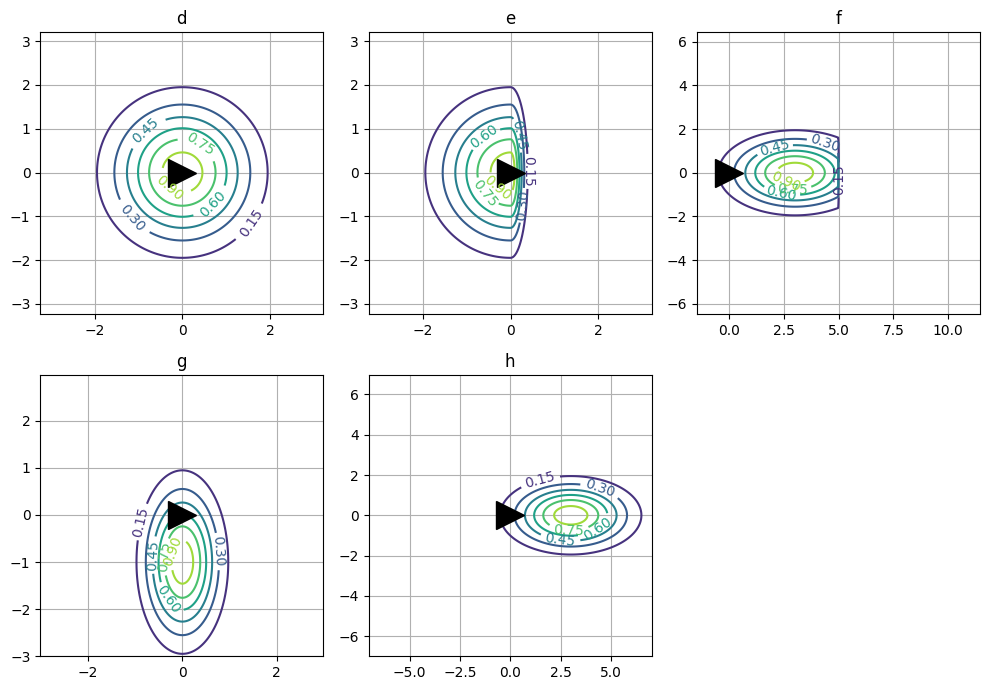

In [63]:
scenarios = ["d", "e", "f", "g", "h"]

# x1_mean = 0.0
# y1_mean = 0.0
# x1_sig = 1.0
# y1_sig = 1.0

# x2_mean = 0.0
# y2_mean = 0.0
# x2_sig = 1.8
# y2_sig = 1.0

params = [
    # x1_mean, y1_mean, x1_sig, y1_sig, x2_mean, y2_mean, x2_sig, y2_sig
    [0.0,  0.0, 1.0, 1.0, 0.0,  0.0, 1.0, 1.0, 3.0, 0.0],
    [0.0,  0.0, 1.0, 1.0, 0.0,  0.0, 0.2, 1.0, 3.0, 0.0],
    [3.0,  0.0, 1.8, 1.0, 3.0,  0.0, 1.0, 1.5, 6.0, 5.0],
    [0.0, -1.0, 0.5, 1.0, 0.0, -1.0, 0.5, 1.0, 3.0, 0.0],
    [3.0,  0.0, 1.8, 1.0, 3.0,  0.0, 1.8, 1.0, 7.0, 0.0],
]

plt.figure(figsize=(10, 7))
nrows = 2
ncols = int((len(scenarios) + 1) / nrows)

for idx, scenario in enumerate(scenarios):
    plt.subplot(nrows, ncols, idx+1)
    plot_costmap(*params[idx])
    plt.title(scenario)
    plt.tight_layout()
    plt.axis("equal")
